In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error

In [15]:
#read csv &top 5 in dataset
df_read = pd.read_csv('BostonHousing.csv')
df = df_read.copy()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [16]:
#check missing value or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [17]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
#scaling 
X = df.drop(['MEDV'],axis=1)
y = df['MEDV']

scaler_x = StandardScaler().fit(X)
X_scale = scaler_x.transform(X)

In [19]:
#splitting the data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size= 0.2,random_state= 42)

#create regressor& k-fold
xgboost = xgb.XGBRegressor()
xgboost.fit(X_train,y_train)
kFold = KFold(n_splits= 5,shuffle= True,random_state= 42)
scores = cross_val_score(xgboost, X_train, y_train, cv=kFold)

cnt = 0
for i in scores:
    cnt+=1
    print('%u fold : %f'%(cnt,i))
print('the average of 5-fold : %f' %scores.mean())


y_pred = xgboost.predict(X_test)
print('-----MSE-----')
print(mean_squared_error(y_test,y_pred))
print('-----MAE-----')
print(mean_absolute_error(y_test,y_pred))
print('-----MAPE-----')
print(mean_absolute_percentage_error(y_test,y_pred))
print('-----RMSE-----')
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print('-----R^2-----')
print(r2_score(y_test,y_pred))


1 fold : 0.819743
2 fold : 0.898377
3 fold : 0.818625
4 fold : 0.849307
5 fold : 0.848585
the average of 5-fold : 0.846927
-----MSE-----
6.909231565384943
-----MAE-----
1.8908873698290656
-----MAPE-----
0.10536624699449404
-----RMSE-----
2.62854171840299
-----R^2-----
0.9057837838492537


<Axes: title={'center': 'Feature Importances'}, xlabel='features'>

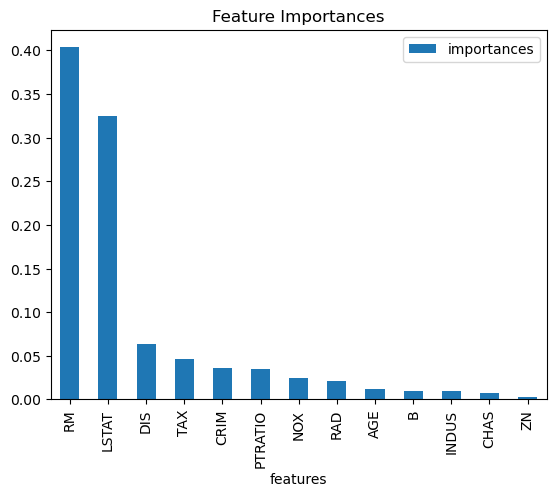

In [20]:
#feature importances
df_importance = pd.DataFrame({'importances':xgboost.feature_importances_,'features':df.drop(['MEDV'],axis=1).columns})
df_importance =df_importance.sort_values(by= 'importances',ascending = False)

df_importance.plot(x ='features' , kind = 'bar',title = 'Feature Importances')

In [21]:
#drop zn feature

X_drop1 = X.drop(['ZN'],axis=1)
y_drop1 = y

scaler_x1 = StandardScaler().fit(X_drop1)
X_scaled1 = scaler_x1.transform(X_drop1)
X_train_drop1, X_test_drop1, y_train_drop1, y_test_drop1 = train_test_split(X_scaled1, y_drop1, test_size= 0.2,random_state= 42)

xgboost_drop1 = xgb.XGBRegressor()
xgboost_drop1.fit(X_train_drop1,y_train_drop1)
kFold_drop1 = KFold(n_splits= 5,shuffle= True,random_state= 42)
scores_drop1 = cross_val_score(xgboost_drop1, X_train_drop1, y_train_drop1, cv=kFold)

y_pred_drop1 = xgboost_drop1.predict(X_test_drop1)
print('-----MSE-----')
print(mean_squared_error(y_test_drop1,y_pred_drop1))
print('-----MAE-----')
print(mean_absolute_error(y_test_drop1,y_pred_drop1))
print('-----MAPE-----')
print(mean_absolute_percentage_error(y_test_drop1,y_pred_drop1))
print('-----RMSE-----')
print(np.sqrt(mean_squared_error(y_test_drop1,y_pred_drop1)))
print('-----R^2-----')
print(r2_score(y_test_drop1,y_pred_drop1))

-----MSE-----
6.549573706457504
-----MAE-----
1.8570679599163578
-----MAPE-----
0.10148082928307704
-----RMSE-----
2.5592134937237074
-----R^2-----
0.9106881791146821


In [22]:
#drop ZN、CHAS feature
X_drop2 = X.drop(['ZN','CHAS'],axis=1)
y_drop2 = y

scaler_x2 = StandardScaler().fit(X_drop2)
X_scaled2 = scaler_x2.transform(X_drop2)
X_train_drop2, X_test_drop2, y_train_drop2, y_test_drop2 = train_test_split(X_scaled2, y_drop2, test_size= 0.2,random_state= 42)

xgboost_drop2 = xgb.XGBRegressor()
xgboost_drop2.fit(X_train_drop2,y_train_drop2)
kFold_drop2 = KFold(n_splits= 5,shuffle= True,random_state= 42)
scores_drop2 = cross_val_score(xgboost_drop2, X_train_drop2, y_train_drop2, cv=kFold)

y_pred_drop2 = xgboost_drop2.predict(X_test_drop2)
print('-----MSE-----')
print(mean_squared_error(y_test_drop2,y_pred_drop2))
print('-----MAE-----')
print(mean_absolute_error(y_test_drop2,y_pred_drop2))
print('-----MAPE-----')
print(mean_absolute_percentage_error(y_test_drop2,y_pred_drop2))
print('-----RMSE-----')
print(np.sqrt(mean_squared_error(y_test_drop2,y_pred_drop2)))
print('-----R^2-----')
print(r2_score(y_test_drop2,y_pred_drop2))


-----MSE-----
7.003962600464974
-----MAE-----
1.91557739201714
-----MAPE-----
0.10478378381352309
-----RMSE-----
2.646500066212917
-----R^2-----
0.9044920049310309


In [23]:
#drop ZN、CHAS、INDUS feature
X_drop3 = X.drop(['ZN','CHAS','INDUS'],axis=1)
y_drop3 = y

scaler_x3 = StandardScaler().fit(X_drop3)
X_scaled3 = scaler_x3.transform(X_drop3)
X_train_drop3, X_test_drop3, y_train_drop3, y_test_drop3 = train_test_split(X_scaled3, y_drop3, test_size= 0.2,random_state= 42)

xgboost_drop3 = xgb.XGBRegressor()
xgboost_drop3.fit(X_train_drop3,y_train_drop3)
kFold_drop3 = KFold(n_splits= 5,shuffle= True,random_state= 42)
scores_drop3 = cross_val_score(xgboost_drop3, X_train_drop3, y_train_drop3, cv=kFold)

y_pred_drop3 = xgboost_drop3.predict(X_test_drop3)
print('-----MSE-----')
print(mean_squared_error(y_test_drop3,y_pred_drop3))
print('-----MAE-----')
print(mean_absolute_error(y_test_drop3,y_pred_drop3))
print('-----MAPE-----')
print(mean_absolute_percentage_error(y_test_drop3,y_pred_drop3))
print('-----RMSE-----')
print(np.sqrt(mean_squared_error(y_test_drop3,y_pred_drop3)))
print('-----R^2-----')
print(r2_score(y_test_drop3,y_pred_drop3))


-----MSE-----
6.9724503429177025
-----MAE-----
1.8956038652681835
-----MAPE-----
0.10146242910399951
-----RMSE-----
2.640539782491016
-----R^2-----
0.9049217148981055


In [24]:
#drop RM feature
X_dropMax = X.drop(['RM'],axis=1)
y_dropMax = y

scaler_max = StandardScaler().fit(X_dropMax)
X_scaled_max = scaler_max.transform(X_dropMax)
X_train_dropMax, X_test_dropMax, y_train_dropMax, y_test_dropMax = train_test_split(X_scaled_max, y_dropMax, test_size= 0.2,random_state= 42)

xgboost_dropMax = xgb.XGBRegressor()
xgboost_dropMax.fit(X_train_dropMax,y_train_dropMax)
kFold_dropMax = KFold(n_splits= 5,shuffle= True,random_state= 42)
scores_dropMax = cross_val_score(xgboost_dropMax, X_train_dropMax, y_train_dropMax, cv=kFold)

y_pred_dropMax = xgboost_dropMax.predict(X_test_dropMax)
print('-----MSE-----')
print(mean_squared_error(y_test_dropMax,y_pred_dropMax))
print('-----MAE-----')
print(mean_absolute_error(y_test_dropMax,y_pred_dropMax))
print('-----MAPE-----')
print(mean_absolute_percentage_error(y_test_dropMax,y_pred_dropMax))
print('-----RMSE-----')
print(np.sqrt(mean_squared_error(y_test_dropMax,y_pred_dropMax)))
print('-----R^2-----')
print(r2_score(y_test_dropMax,y_pred_dropMax))


-----MSE-----
12.778926387131834
-----MAE-----
2.435093855390362
-----MAPE-----
0.1137671395589231
-----RMSE-----
3.574762423872646
-----R^2-----
0.8257429817960648
